- XGBoost는 5장에서 설명할 몇 가지 확실한 장점이 있는 독특한 형태의 그레이디언트 부스팅 구현이다.
- 일반적인 그레이디언트 부스팅에 비해 XGBoost의 장점을 이해하려면 먼저 기존 그레이디언트 부스팅의 작동 방식을 알아야 한다.
- 기존 그레이디언트 부스팅의 구조와 매개변수는 XGBoost에서도 제공한다. 이 장에서 XGBoost의 핵심인 강력한 그레이디언트 부스팅에 대해 알아보겠다.
- 기존 그레이디언트 부스팅의 구조와 매개변수는 XGBoost에서도 제공한다. 이 장에서 XGBoost의 핵심인 강력한 그레이디언트 부스팅 대해 알아보겠다.
- 이장에서 그레이디언트 부스팅 모델을 만들고 이전 결과와 비교해보겠다.
- 특히 **학습률** 매개변수에 초점을 맞추어 XGBoost와 같은 강력한 그레이디언트 부스팅 모델을 만들어보겠다.
- 마지막으로 빠른 알고리즘이 필요한 외계 행성 데이터셋 문제를 다루어보겠다. 속도는 빅 데이터 세계에서 핵심적인 요구사항이며 XGBoost는 이를 만족했다.

-----
# 이 장 구성

- 배깅에서 부스팅까지
- 그레이디언트 부스팅 작동 방식
- 그레이디언트 부스팅 매개변수 튜닝
- 빅 데이터 다루기 - 그레이디언트 부스팅 vs XGBoost

# 4.1 배깅에서 부스팅까지
- 3장에서 랜덤 포레스트 같은 앙상블 머신러닝 알고리즘이 많은 모델을 하나로 연결하여 더 나은 예측을 만드는 이유를 배웠다.
- **랜덤 포레스트**는 (결정 트리에서) 부트스트랩 샘플을 사용하기 때문에 배깅 알고리즘으로 분류된다.
----
- 이와 달리 **부스팅은 개별 트리의 실수로부터 학습한다. 이전 트리의 오차를 기반으로 새로운 트리를 훈련하는 것이 기본적인 아이디어다.**
- 부스팅에서 새로운 트리에 대한 **오차를 수정**하는 것은 배깅과 다른 접근 방법이다. 배깅 모델에서는 새로운 트리가 이전 트리에 주의를 기울이지 않다. 또한 **새로운 트리는 부트스트래핑을 사용해 처음부터 훈련되며 최종 모델은 모든 개별 트리의 결과를 합친다.하지만 부스팅에서는 개별 트리가 이전 트리를 기반으로 만들어진다.** 독립적으로 트리가 동작하지 않으며 **다른 트리 위에 만들어진다.**

## 4.1.1 에이다부스트 소개
- 에이다부스트는 인기 있는 초기 부스팅 모델 중 하나이다.
- 에디아부스트에서는 새로운 트리가 이전 트리의 오차를 기반으로 가중치를 조정한다.
- 오류 샘플의 가중치를 높여 잘못된 예측에 더 많은 주의를 기울인다.
- 에이다부스트는 이렇게 실수에서 학습하기 때문에 약한학습기를 강력한 학습기로 만들 수 있다. 
- 약한 학습기는 우연보다 조금 나은 성능을 내는 머신러닝 모델을 말한다.
- 강한 학습기는 많은 양의 데이터에서 학습하여 매우 잘 수행되는 모델이다.
----

- 약한 학습기를 강력한 학습기로 변환하는 것이 부스팅 알고리즘의 일반적인 아이디어이다.
- 약한 학습기는 무작위 예측보다 조금 낫다. 하지만 약한 학습기로 시작하는 데는 목적이 있다.
- **일반적으로 부스팅은 강력한 기반 모델을 만드는 것이 아니라 반복적으로 오류를 고치는 데 초점을 맞춘다.**
- 기반 모델이 너무 강력하면 학습 과정이 제한되어 부스팅 모델의 전략을 약화시킨다.

- 수백 번의 반복을 통해 약한 학습기가 강력한 학습기로 바뀐다. 즉, 작은 성능 개선을 오래 지속한다.
- 사실 부스팅은 지난 수십년 동안 최적의 결과를 만드는 점에서 가장 뛰어난 머신러닝 전략 중 하나이다.
---
- 에이다부스트의 강력한 대안인 그레이디언트 부스팅으로 넘어가겠다.

# 4.1.2 그레이디언트 부스팅의 특징
- 그레이디언트 부스팅은 에이다부스트와 다른 전략을 사용한다.
- 그레이디언트 부스팅도 잘못된 예측을 기반으로 조정되지만 한 단계 더 나아간다.
- **그레이디언트 부스팅은 이전 트리의 예측 오차를 기반으로 완전히 새로운 트리를 훈련한다.**
- 즉, 그레이디언트 부스팅은 각 트리의 실수를 살펴보고 이런 실수에 대한 **완전한 새로운 트리를 만든다.**
- 새로운 트리는 올바르게 예측된 값에는 영향을 받지 않는다.

---
- 오차에만 초점을 맞추는 머신러닝 알고리즘을 만들려면 정확한 최종 예측을 만들기 위해 오차를 계산하는 방법이 필요하다.
- 이런 방법은 모델의 예측과 실제 값 사이의 차이인 잔차를 활용한다. 일방적인 방법은 다음과 같다.

- 그레이디언트 부스팅은 각 트리 예측 값을 더해 모델 평가에 사용한다.
- 이 아이디어는 그레이디언트 부스팅의 고급 버전인 XGBoost의 핵심이므로 트리의 예측을 계산하고 더하는 것을 이해하는 것이 중요하다. 그레이디언트 부스팅 모델을 직접 만들어보면 예측을 계산하고 더하는 과정을 잘 볼 수 있다.
- 다음 절에서 직접 그레이디언트 부스팅 모델을 만들어보겠다. 먼저 그레이디언트 부스팅의 작동방식에 대해 배워보겠다.

---
요약하면 AdaBoost와 Gradient Boosting은 모두 약한 학습자를 강력한 학습자로 결합하는 부스팅 알고리즘이지만 샘플에 가중치를 부여하는 접근 방식과 훈련 중에 앙상블을 업데이트하는 방법이 다릅니다. 보다 유연하고 강력한 Gradient Boosting은 종종 선호되며 광범위한 작업에서 더 나은 성능을 제공하는 경향이 있습니다.

AdaBoost와 달리 Gradient Boosting은 데이터 포인트 가중치에 중점을 두지 않습니다. 대신, 각각의 새로운 약한 학습자를 잔차(실제 목표 값과 기존 앙상블에 의한 예측 간의 차이)에 맞춥니다.
각 약한 학습자는 이전의 약한 학습자가 만든 오류를 줄여서 모델을 개선하려고 합니다.

## 4.2. 그레이디언트 부스팅 작동 방식
- 그레이디언트 부스팅의 작동 방식을 살펴보고 이전 트리의 오차에 새로운 트리를 훈련하는 식으로 그레이디언트 부스팅 모델을 직접 만들어보자.
- 여기서 수학적인 핵심 요소는 **잔차**이다. 

## 4.2.1 잔차
- 잔차는 타깃과 모델의 예측 사이의 차이다. 
- 통계학에서는 일반적으로 선형 회귀 모델이 데이터에 얼마나 잘 맞는지 평가하기 위해 잔차를 사용한다.

>다음과 같은 예를 생각해보자.
1. 자전거 대여
a)예측: 759
b)타깃: 799
c)잔차: 799-759 = 40

2. 소득
a)예측: 100,000
b)타깃: 88,000
c)잔차" 88,000 - 100,000 = -12,000

여기서 보듯이 잔차는 모델 예측이 정답에서 얼마나 떨어져 있는지 알려주며 양수 또는 음수일 수 있다.

#### 선형회귀의 잔차
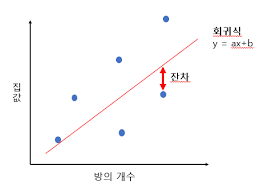
- 선형 회귀의 목적은 잔차의 제곱을 최소화하는 것이다. 
- 그림에 나와 있듯이 잔차는 선형 회귀 직선이 데이터에 얼마나 잘 맞는지 보여준다.
- 통계학에서 종종 데이터에 대한 통찰을 얻기 위해 잔차를 그래프로 시각화하여 선형 회귀 분석을 수행한다.

그레이디언트 부스팅 알고리즘을 직접 구현해보기 위해 각 트리의 잔차를 계산하고 이 잔차에 새로운 모델을 훈련해보겠다.

## 4.2.2 그레이디언트 부스팅 모델 구축 방법 배우기
- 그레이디언트 부스팅 모델을 직접 만들어보면 그레이디언트 부스팅의 작동방식을 잘 이해할 수 있다.
- 모델을 만들기 전에 데이터를 준비하고 모델에 주입할 수 있도록 나누자.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
xgb.set_config(verbosity = 0)

# verbosity=0: verbosity 매개변수는 XGBoost 훈련 프로세스 중에 인쇄되는 정보의 양을 제어하는데 사용됩니다.
# 값 0은 추가 정보(오류 제외)가 인쇄되지 않음을 의미합니다.
# 1 이상으로 설정하면 진행률 및 성능 메트릭을 포함하여 교육 프로세스에 대한 자세한 정보가 인쇄됩니다.
# 상세도를 0으로 설정하면 추가 정보의 인쇄를 억제하여 오류 메시지를 제외하고는 아무 출력 없이 교육 프로세스를 자동으로 만듭니다.
# 이는 특히 대규모 실험을 실행하거나 과도한 출력이 필요하지 않은 프로덕션 환경에서 출력을 복잡하게 만들지 않으려는 경우에 유용할 수 있습니다.

In [2]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
df_bikes

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,1796


In [3]:
x_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_bikes, y_bikes, random_state= 2)

## 4.2.3 그레이디언트 부스팅 모델 배우기
- 그레이디언트 부스팅 모델을 만드는 과정은 다음과 같다.

-------
1-1. 결정트리를 훈련한다. max_depth가 1인 결정 트리 스텀프를 사용하거나 Max_depth가 2나 3인 결정 트리를 사용할 수 있다.

1-2. 기본학습기라 부르는 결정 트리는 높은 정확도를 위해 튜닝하지 않는다.

1-3. 기본 학습기에 크게 의존하는 모델이 아니라 오차에서 학습하는 모델을 원하기 때문이다. 

#### 1-4. 앙상블의 첫번째 트리인 tree_1을 max_depth=2로 결정 트리를 초기화하고 훈련 세트에서 훈련한다.
----

In [4]:
from sklearn.tree import DecisionTreeRegressor
tree_1 = DecisionTreeRegressor(max_depth = 2, random_state=2)
tree_1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

---
2. **테스트 세트가 아니라 훈련 세트에 대한 예측을 만든다.** 잔차를 계산하기 위해서 훈련 단계에서 예측과 타깃을 비교해야 하기때문이다. 모델의 테스트 단계는 모든 트리를 구성한 후 마지막에 온다. tree_1의 predict()메서드에 x_train을 입력하여 첫 번째 반복에 대한 훈련 세트 예측을 만든다.

In [5]:
y_train_pred = tree_1.predict(x_train)

- 잔차를 계산한다. 잔차는 예측과 타깃 사이의 차이이다.
- X_train 예측인 y_train_pred를 타깃 y_train에서 빼어 잔차를 구한다.

In [6]:
# 잔차는 다음 트리의 타깃이 되기 때문에 y2_train이라고 이름을 지었다.

y2_train = y_train - y_train_pred


4. 새로운 트리를 이 잔차에서 훈련한다. 잔차에서 트리를 훈련하는 것은 훈련 세트에서 훈련하는 것과 다르다. 주요한 차이는 예측값이다. 자전거 대여 데이터셋에서 잔차에 새로운 트리를 훈련할 때 점점 더 작은 값을 얻는다. 새로운 트리를 초기화하고 x_train, y2_train에서 훈련한다.

In [7]:
tree_2 = DecisionTreeRegressor(max_depth =2, random_state=2) # 초기화
tree_2.fit(x_train, y2_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

5. 2~4단계를 반복한다. 이 과정이 계속되면서 잔차는 양수나 음수 방향으로 0에 가까워진다. 앙상블에 추가할 트리 개수만큼 반복이 계속된다. 세 번째 트리에서 이 과정을 반복해보겠다.

In [8]:
y2_train_pred = tree_2.predict(x_train)
y3_train = y2_train - y2_train_pred
tree_3 = DecisionTreeRegressor(max_depth = 2, random_state=2)
tree_3.fit(x_train, y3_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

이 과정이 수십,수백,수천 개의 트리까지 계속될 수 있다. 일반적인 상황이라면 계속 진행될 것이다. 약한 학습기를 강력한 학습기로 만들려면 몇개 트리로는 부족하다. 여기서 목적은 그레이디언트 부스팅의 작동방식을 이해하는 것이기 때문에 일반적인 개념을 다룬 것에 만족하자.

---
6. 결과를 더하자. 다음처럼 최종 결과를 위해 테스트 세트에 대한 각 트리의 예측을 만든다.

In [9]:
y1_pred = tree_1.predict(x_test)
y2_pred = tree_2.predict(x_test)
y3_pred = tree_3.predict(x_test)

In [10]:
y_pred = y1_pred + y2_pred + y3_pred

7. 마지막으로 다음처럼 평균 제곱근 오차를 계산하자.

In [11]:
from sklearn.metrics import mean_squared_error as MSE
MSE(y_test, y_pred)**0.5

911.0479538776444

## 사이킷런 구현 

In [12]:
# 사이킷런의 그레이디언트 부스틍 회귀 모델의 기본 손실 함수는 제곱 오차이고 
# 분류 모델의 기본 손실 함수는 로지스틱 손실 함수이다.
# 경사 하강법으로 두 함수를 미분하면 모두 y - y_pred꼴을 얻는다.

# 타깃과 평균 사이 잔차1를 구한다.
# 그 잔차로 훈련한다.
res_1 = y_train - np.mean(y_train)
tree_1.fit(x_train, res_1)

# 잔차 2를 구한다.
# 그 잔차2로 훈련한다.
pred_1 = tree_1.predict(x_train)
res_2 = y_train - pred_1
tree_2.fit(x_train, res_2)

# 잔차3을 구한다.
# 그 잔차3으로 훈련한다.
pred_2 = tree_2.predict(x_train)
res_3 = y_train - (pred_1 + pred_2)
tree_3.fit(x_train, res_3)

# 앙상블에 추가된 세 개의 트리로 테스트 세트에 대한 예측을 만들어 모두 더하고 타깃과의 오차를 계산한다.
from sklearn.metrics import mean_squared_error

pred_all = tree_1.predict(x_test) + tree_2.predict(x_test) + tree_3.predict(x_test)
mean_squared_error(y_test, pred_all, squared=False)

# GradientBoostingClassifier의 경우 클래스별로 각 트리의 예측을 더한 후 시그모이드 함수를 적용한다.


911.0479538776432

## 4.2.4 사이킷런으로 그레이디언트 부스팅 모델 만들기
- 사이킷런의 GradientBoostingRegressor을 상요하면 이전 절과 동일한 결과를 얻을 수 있다.
- GradientBoostingRegressor을 사용하면 그레이디언트 부스팅 알고리즘을 훨씬 빠르고 쉽게 구현가능.

In [13]:
# 1. 먼저 Sklearn.ensemble 모듈에서 GradientBoostingRegressor 클래스를 임포트
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
# 2. GradientBoostingRegressor를 초기화할 때 중요한 매개변수가 몇 개 있다.
# 이전 절과 동일한 결과를 얻기 위해 max_depth = 2, random_state=2로 지정하는 것이 중요하다.
# 또한 세개의 트리만 사용하기 때문에 n_estimators=3으로 지정한다. 마지막으로 learning_rate = 3으로 설정한다.

gbr = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, random_state = 2, learning_rate = 1.0)


In [15]:
# 3. 이전 모델을 초기화했으므로 훈련데이터에서 훈련하고 테스트 데이터에서 모델을 평가해보자.
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
MSE(y_test, y_pred)**0.5

911.0479538776439

In [16]:
# 4. 30개의 트리로 그레이디언트 부스팅 회귀 모델을 만들고 평가해보겠다.
gbr = GradientBoostingRegressor(max_depth = 2, n_estimators=30, random_state = 2, learning_rate=1.0)

gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
MSE(y_test, y_pred)**0.5

#rmse = np.sqrt(score)


857.1072323426944

MSE: MSE는 평균 제곱 오차(Mean Squared Error)로서, 실제값과 예측값 간의 오차를 **제곱하여** 평균을 구한 값입니다. 각 데이터 포인트에 대해 오차를 제곱한 후 모든 데이터 포인트에 대한 제곱 오차의 평균을 구합니다. MSE는 오차를 양수로 만들어주고, 특히 큰 오차의 영향을 강조합니다.

**0.5: 이 부분은 MSE의 제곱근을 의미합니다. 제곱근을 취함으로써 오차의 원래 스케일로 돌아오게 됩니다. 즉, 예측 오차를 다시 원래의 단위로 변환하여 해석할 수 있게 됩니다. 예측 오차가 양의 값으로 제곱되었으므로, 제곱근을 취하면 오차가 항상 양수가 됩니다.

Sqrt의 경우 제곱근

In [17]:
# 이번에는 300개를 늘려보겠다.
gbr = GradientBoostingRegressor(max_depth = 2, n_estimators = 300, random_state=2, learning_rate=1.0)

gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
MSE(y_test, y_pred)**0.5 # 실제값과 예측값의 차이 

936.3617413678853

- 놀란다. 점수가 더 나빠졌다. 무엇을 잘못한걸까? 
- 놀라운 결과를 얻을 때마다 코드를 재차 확인해볼 필요가 있다.
- 아직 자세히 설명하지 않았지만 learning_rate 매개변수를 바꿔보자. learning_rate = 1.0을 제거하고 사이킷런 기본값을 사용하면 어떻게 될까?

In [18]:
gbr = GradientBoostingRegressor(max_depth = 2, n_estimators=300, random_state=2)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
MSE(y_test, y_pred) **0.5

653.7456840231495

- 사이킷런의 learning_Rate 기본값을 상요해 점수를 936점에서 654로 낮추었다.
- 다음 절에서 learning_rate 매개변수에 초점을 맞추면서 그레이디언트 부스팅의 다른 매개변수에 대해 알아보자.

# 4.3 그레이디언트 부스팅 매개변수 튜닝
- 이절에서 가장 중요한 그레이디언트 부스팅의 매개변수인 learning_rate와 모델의 트리 개수 또는 반복 횟수인 n_estimators에 초점을 맞춰보겠다.

- 또한 확률적 그레이디언트 부스팅을 만드는 subsample 매개변수도 알아보겠다. 그리고 RandomizedSearchCV를 사용해 XGBoost와 결과를 비교하겠다.

## 4.3.1 leaning_rate
- 이전 절에서 GradientBoostingRegressor의 learning_rate 매개변수 값을 1.0에서 사이킷런 기본값인 0.1로 바꾸어서 크게 성능을 높였다.

- learning_Rate는 모델 구축에 너무 큰 영향을 끼지치 않도록 개별 트리의 기여를 줄인다.
- 이를 축소라고도 부른다. 이 매개변수를 주의 깊게 조정하지 않고 기본 학습기의 오차를 기반으로 전체 앙상블을 만들면 모델에 처음 추가된 트리의 영향이 너무 크게 된다. learning_rate는 개별 트리의 영향을 제한한다. **일반적으로 트릭 개수인 n_estimators를 늘리면 learning_rate는 줄여야 한다.**

- 최적의 learning_Rate값을 결정하는 것은 n_estimators에 따라 다르다. 먼저 n_estimators를 고정하고 
- learning_rate의 효과를 확인해보겠다.
- learning_rate를 0에서 1까지 바꾸어보겠다. learning_Rate이 1이면 트리 결과에 어떤 조정도 하지 않는다는 의미
- 기본값 0.1은 트리의 영향을 10%로 줄인다는 뜻. (모델에 처음 추가된 트리의 영향이 큼)



In [19]:
# 1. 테스트 범위 정의
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1,0]

In [20]:
for value in learning_rate_values:
    gbr = GradientBoostingRegressor(max_depth = 2, n_estimators=300, random_state=2, learning_rate = value)
    
    gbr.fit(x_train, y_train)
    y_pred = gbr.predict(x_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('학습률:', value, ', 점수:', rmse)

학습률: 0.001 , 점수: 1633.0261400367253
학습률: 0.01 , 점수: 831.5430182728547
학습률: 0.05 , 점수: 685.0192988749716
학습률: 0.1 , 점수: 653.7456840231495
학습률: 0.15 , 점수: 687.666134269379
학습률: 0.2 , 점수: 664.312804425697
학습률: 0.3 , 점수: 689.4190385930236
학습률: 0.5 , 점수: 693.8856905068778
학습률: 1 , 점수: 936.3617413678853
학습률: 0 , 점수: 1983.0258367489087


- 출력에서 볼 수 있듯이 기본 learning_rate 값 0.1이 300개의 트리에서 가장 좋은 성능을 낸다.
- **정말 중요한점** learning_rate와 n_estimators 매개변수를 함께 튜닝해야 한다.

## 4.3.2 기본 학습기
- 그레이디언트 부스팅 회귀 모델의 기본학습는 결정 트리이다.
- 이 결정 트리를 미세 튜닝할 필요가 없지만 2장에서 소개한 것처럼 정확도를 높이기 위해 기본 학습기의 매개변수를 조정할 수 있다.
- 예를들어 max_depth를 1,2,3,4로 바꾸면서 결과를 비교해볼 수 있다.

In [21]:
depths = [None, 1,2,3,4]
for depth in depths:
    gbr = GradientBoostingRegressor(max_depth = depth, n_estimators=200, random_state=2)
    gbr.fit(x_train, y_train)
    
    y_pred = gbr.predict(x_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('최대깊이:', depth, '점수:', rmse)

최대깊이: None 점수: 874.8692494690362
최대깊이: 1 점수: 727.9758708484177
최대깊이: 2 점수: 654.2140821630711
최대깊이: 3 점수: 646.4043764510722
최대깊이: 4 점수: 658.1704956239338


## GradientBoostingRegressor의 손실 그래프 그리기
- 사이킷런의 GradientBoostingClassifier와 GradientBoostingRegressor는 모두 잔차를 타깃으로 결정트리를 훈련하기 때문에 약한 학습기로 DecisionTreeRegressor(splitter = 'best')를 사용한다. max_depth 매개변수의 기본값은 3이다.
---
- 앞서 언급한 것처럼 첫 번째 잔차를 계산하기 위한 초기 모델은 **init_속성에 저장되어 있다.** 회귀일 경우 타깃 평균을 계산하는 DummyRegressor() 객체이고 분류일 경우 다수 클래스를 예측하는 DummyClassifier() 객체이다.

In [22]:
gbr.init_

DummyRegressor()

In [23]:
# 앙상블에 추가된 트리는 estimators_ 속성에 저장되어 있다. 
# 이 배열의 길이를 확인하면 앙상블에 추가된 트리의 개수를 알 수 있다.
len(gbr.estimators_)

200

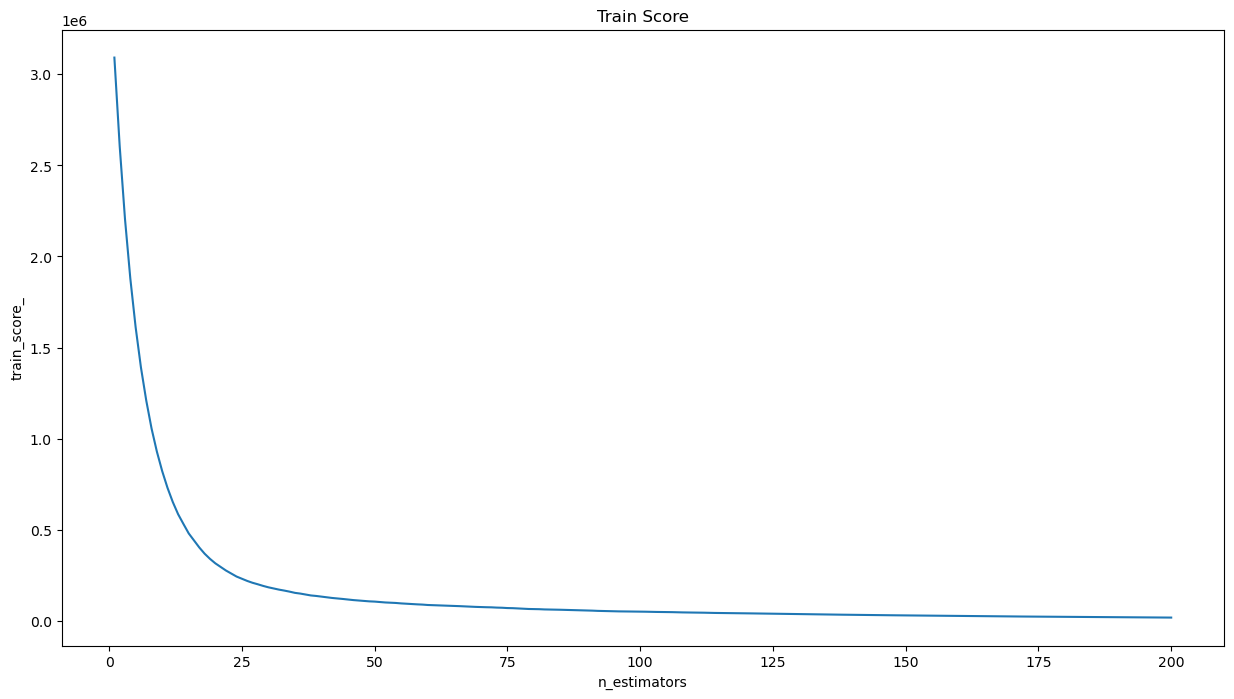

In [24]:
# 그레이디언트 부스팅 모델에 트리를 추가하면서 줄어드는 손실 함수 값은 train_score_속성에 저장되어 있다.
# 이 속성을 사용해 트리가 추가되면서 줄어드는 손실 값을 그래프로 출력해보겠다.
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(range(1, 201), gbr.train_score_)  # range(1, 301)을 range(1, 201)로 수정
plt.xlabel('n_estimators')
plt.ylabel('train_score_')
plt.title('Train Score')
plt.show()

- 초기에 손실이 크게 줄어들지만 트리 개수가 30개 정도를 넘어가면서 완만해지는 것을 볼 수 있다.
- 사이킷런의 그레이디언트 부스팅 클래스는 일정한 수준 이상 향상되지 않으면 훈련을 종료할 수 있는 조기 종료 기법을 제공한다.
- validation_fraction(기본값 0.1)만큼 훈련 세트에서 검증 데이터를 덜어낸 다음 n_iter_no_change 반복 횟수 동안 검증 점수가 tol(기본값 1e~4)만큼 향상되지 않으면 훈련을 종료한다. n_iter_no_change의 기본값은 None으로 조기 조욜를 수행하지 않는다.

## 4.3.3 subsample
- subsample 매개변수는 기본 학습기에 사용될 샘플의 비율을 지정한다.
- subsample을 1.0보다 작게 설정하면 트리를 훈련할 때 샘플의 일부만 사용하게 된다.
- 예를들어 subsample = 0.8은 80%의 훈련 세트만 사용하여 각 트리를 훈련한다.

In [25]:
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]
for sample in samples:
    gbr = GradientBoostingRegressor(max_depth = 3, n_estimators = 300, subsample = sample, random_state = 2)
    
    gbr.fit(x_train, y_train)
    y_pred = gbr.predict(x_test)
    rmse = MSE(y_test, y_pred)**0.5
    print('subsample:', sample, ', 점수:', rmse)

subsample: 1 , 점수: 646.4045923317708
subsample: 0.9 , 점수: 620.1819001443569
subsample: 0.8 , 점수: 617.2355650565677
subsample: 0.7 , 점수: 608.5878109774266
subsample: 0.6 , 점수: 636.998132650159
subsample: 0.5 , 점수: 626.9974073227554


## 4.3.4 RandomizedSearchCV
- 잘 동작하는 모델을 얻었지만 아직 2장에서 소개한 그리드 서치를 수행하지 않았다. 앞선 모델을 참고했을 때
- max_depth=3, subsample = 0.7, n_estimators = 300, learning_rate = 0.1 근처가 그리드 서치로 탐색하기 좋은 출발점이다.
- n_estimators는 높이고 learning_rate는 낮추는 것이 좋다.

In [26]:
# 1. 탐색할 매개변수 리스트를 지정한다.

params = {'subsample': [0.65, 0.7, 0.75],
           'n_estimators': [300,500,1000],
           'learning_rate': [0.05, 0.075, 0.1]
          }

- n_estimators는 300에서 시작해서 증가시키고, learning_rate는 0.1에서 시작해서 줄인다. 분산을 줄이기 위해 max_depth = 3으로 유지하겠다.
- 가능한 하이퍼파라미터 조합이 27개이므로 RandomizedSearchCV를 사용해 이 조합에서 10번을 시도해 좋은 모델을 찾아보겠다.

> **GridSearchCV**로도 27번의 조합을 탐색할 수 있지만 어느 순간 조합이 많아지면 **RandomizedSearchCV**가 필요하다. 여기서는 속도를 높이고 연습하기 위해서 **RandomizedSearchCV**를 사용한다.

In [27]:
# 2. RandomizedSearchCV를 임포트하고 그레이디언트 부스팅 모델을 초기화한다.
from sklearn.model_selection import RandomizedSearchCV
gbr = GradientBoostingRegressor(max_depth = 3, random_state=2)

In [28]:
# 그 다음 gbr과 Parmas, 반복 횟수, 측정 지표, 폴드 개수를 입력으로 사용해 RandomizedSearchCV 객체를 초기화한다.
# 속도를 높이기 위해 n_jobs = -1로 지정하고 동일한 결과를 얻기 위해 random_State = 2로 지정한다.

rand_reg = RandomizedSearchCV(gbr, params, n_iter = 10, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1, random_state= 2)

In [29]:
# 이제 모델을 훈련세트에 훈련하고 최상의 매개변수와 점수를 출력한다.

In [30]:
rand_reg.fit(x_train, y_train)
best_model = rand_reg.best_estimator_
best_params = rand_reg.best_params_
print("최상의 매개변수:", best_params)
best_score = np.sqrt(-rand_reg.best_score_)
print("훈련 점수: {:.3f}".format(best_score))
y_pred = best_model.predict(x_test)
rmse_test = MSE(y_test, y_pred)**0.5
print('테스트 세트 점수: {:.3f}'.format(rmse_test))

최상의 매개변수: {'subsample': 0.65, 'n_estimators': 300, 'learning_rate': 0.05}
훈련 점수: 636.799
테스트 세트 점수: 625.985


- 이 매개변수에서 한 개씩 또는 여러 개의 매개변수를 바꿔서 실험해볼 수 있다. n_estimators = 300이 최상의 모델이지만 learning rate를 조정하고 n_estimators를 증가시켜 더 좋은 결과를 얻을 수 있다. subsample도 실험가능

In [31]:
# 5. 몇 번의 실험을 반복한 후에 다음 모델을 얻었다.
# 더 좋아질 수도 있다. 도전해보자.
gbr = GradientBoostingRegressor(max_depth = 3, n_estimators = 1600, subsample = 0.75, learning_rate =0.02,
                               random_state = 2)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
MSE(y_test, y_pred)**0.5

597.7852637855387

## 4.3.5 XGBoost
- XGBoost는 일반적인 구조는 동일한 그레이디언트 부스팅의 고급 버전이다.
- 즉 잔차로부터 훈련한 트리를 추가하여 약한 학습기를 강력한 학습기로 바꾼다.
- 이전 절에서 소개한 매개변수와 다른 것은 learning_rate으로 XGBoost에서는 eta이다.
- 동일한 매개변수로 XGBoost 회귀 모델을 만들어보고 결과를 비교해보겠다.
- 다음처럼 XGBoost 패키지에서 XGBRegressor를 임포트하고, 모델을 초기화하고 훈련한 다음 점수를 계산한다.

In [32]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(max_depth = 3, n_estimators = 1600, eta = 0.02, subsample = 0.75, random_state =2)
xg_reg.fit(x_train, y_train)
y_pred = xg_reg.predict(x_test)
MSE(y_test, y_pred)**0.5

# 성능도 좋고 빠르네..

584.3395337495713

# 4.4 빅 데이터 다루기 - 그레이디언트 부스팅 vs XGBoost
- 현실 세계의 데이터셋은 거대하며 소조 개의 데이터 포인트로 이루어질 수 있다.
- 컴퓨터 한 대의 자원은 제약되어 있기 때문에 한 대의 컴퓨터로만 작업하는 것은 단점이 될 수 있다.
- 빅 데이터를 다룰 때 종종 병렬 컴퓨팅을 활용하기 때문에 클라우드를 사용한다.
- 대용량 데이터셋은 계산의 한계를 넘어설 때가 있다.
- 이 책에서 지금까지 사용한 데이터셋은 수만 개의 행과 수 백개 이하의 열로 이루어져 있다.
- 실행 시간이 오래 걸리지 않아 (대부분) 오류가 발생하지 않는다.

---
- 이 절에서는 외계 행서 데이터셋을 살펴보겠다.
- 이 데이터셋은 5,087개의 행과 3,189개의 열로 이루어져있다.
- 별의 생명 주기 동안에 빛의 밝기를 기록한 것이다.
- 행과 열의 개수를 곱하면 1500만 포이트가 된다.
- 100개의 트리를 사용한다면 모델을 구축하기 위해 15억개 데이터 포인터를 처리해야 한다.
- 이절의 코드를 실행하는데 2013년형 맥북 에어로 약 5분이 걸렸다.

## 4.4.1 외계 행성 데이터셋 소개
- 외계 행성 데이터셋은 2017년 캐글에 소개된 데이터셋이다.
- 이 데이터셋에는 별의 밝기에 대한 정보가 포함되어 있다.
- 각 행은 하나의 별에 대한 정보를 나타내며 각 열은 시간에 따라 밝기의 변화를 저장하고 있다.
- 밝기 외에도 LABEL 열에는 별이 외계 행성을 가지고 있으며 2 아니면 1로 레이블되어 있다.
- 이 데이터셋은 수천 개의 별의 밝기를 담고 있따. 별의 밝기는 종종 광속이라고도 부르며 감지된 별의 밝기이다.

> 감지된 밝기는 실제 밝기와 다르다. 예를 들어 멀리 떨어진 매우 밝은 별의 광속은 작을 수 있다.(흐리게 보인다.)
이에 반해 매우 가까운 거리에 있는 중간 밝기의 별이 높은 광속을 가질수 있다.(밝게 보인다.)

- 별의 밝기가 주기적으로 달라질 때 외계 행성이 이 별을 공전하고 읽을 가능성이 있다.
- 외계 행성이 별의 앞을 지나갈 때 빛의 일부분을 가리고 이로 인해 별의 밝기가 약간 감소된다고 가정한 것이다.

> 외계 행성을 찾는 일은 드뭅니다. 별이 외계 행성을 가지고 있는지 아닌지 나타내는 LABEL 열을 보면 외계행성이 있는 경우가 많지 않다. 따라서 이 데이터셋은 불균형하다. 7장에서 이 데이터셋을 더 자세하게 살펴보면서 불균형한 데이터셋에 대해 다루겠다.

## 4.42 외계 행성 데이터셋 전처리


In [33]:
df = pd.read_csv('exoplanets.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [35]:
df.isna().sum().sum()

0

In [36]:
# 데이터를 X와 y로 나눕니다.
X = df.iloc[:,1:]
y = df.iloc[:,0] 

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# 4.43 그레이디언트 부스팅 분류 모델 만들기
- 그레이디언트 부스팅 분류 모델은 그레이디언트 회귀 모델과 같은 방식으로 동작한다. 측정 지표가 주요한 차이점이다.
- GradientBoostingClassifier와 XGBClassifier, accuracy_score를 임포트하여 두 모델을 비교 

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
# XGBRegressor를 임포트합니다.
from xgboost import XGBClassifier

# accuracy_score를 임포트합니다.
from sklearn.metrics import accuracy_score

# 4.4.4 시간 측정
- 파이썬은 시간을 측정하는 데 사용할 수 있는 time패키지를 제공한다.
- 모델을 훈련하고 평가하기 전후의 시간을 기록하는 것이 일반적인 방법이다.
- 두 시간의 차이가 모델을 훈련하고 평가하는 데 걸리는 시간이다.

다음처럼 time 패키지를 임포트한다. 

In [38]:
import time
start = time.time()

df.info()

end = time.time()
elapsed = end - start

print('\n실행 시간: ' + str(elapsed) + ' 초')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB

실행 시간: 0.010210990905761719 초


In [39]:
%timeit -n 100 -r 3 sum(np.square(range(10000)))

780 µs ± 6.66 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [40]:
%%timeit -n 100 -r 3 
summing = 0
for i in range(10000):
    summing += i**2

2.03 ms ± 20 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


## 4.4.5 속도 비교
- 이제 외계 행성 데이터셋을 사용해 GradientBoostingClassifier와 XGBoostClassifier의 속도를 비교
- 모델의 크기를 제한하기 위해 max_depth =2와 n_estimators = 100으로 설정하겠다.
- GradientBoostingClassifier부터 시작해보자.

In [41]:
start = time.time()

gbr = GradientBoostingClassifier(n_estimators=100, 
                                 max_depth=2, random_state=2)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))

end = time.time()
elapsed = end - start

print('실행 시간: ' + str(elapsed) + ' 초')

점수: 0.9874213836477987
실행 시간: 181.03421807289124 초


In [42]:
start = time.time()

# XGBRegressor를 초기화합니다.
xg_reg = XGBClassifier(n_estimators=100, max_depth=2)

# 훈련 세트에서 xg_reg를 훈련합니다.
xg_reg.fit(X_train, y_train)

# 테스트 세트에 대한 예측을 만듭니다.
y_pred = xg_reg.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('점수: ' + str(score))

end = time.time()
elapsed = end - start

print('실행 시간: ' + str(elapsed) + ' 초')

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [1 2]

## 마치며 

이 장에서 배깅과 부스팅의 차이에 대해 배웠다. 직접 그레이디언트 부스팅 회귀 모델을 만들면서 작동 방식을 배웠다.
learning_rate, n_estimators, max_depth와 확륙적 그레이디언트 부스팅을 만드는 usbsample 매개변수 등 다양한 그레이디언트 부스팅 매개변수로 모델을 만들었다. 마지막으로 외계 행성을 가진 별인지 예측하기 위한 대용량 데이터셋으로 GraidientBoostingClassifier와 XGBoostClassifier를 비교해보았다. 
XGBoostClassifier가 2배에서 10배까지 빠르고 더 정확하다.

이런 기술을 배움으로써 그레이디언트 부스팅 같이 비슷한 머신러닝 알고리즘 대신 XGBoost를 적용해야 할 시기를 이해할 수 있다. 이제 n_esxtimators와 learning_rate와 같은 핵심 매개변수를 적절히 활용하여 강력한 XGBoost 모델과 그레이디언트 부스팅 모델을 만들 수 있다. 또한 직관에 의존하는 대신 계산 시간을 측정할 수 있는 방법을 배웟다.

지금까지는 XGBoost의 거시적 측면에서 머신러닝과 데이터 분섹에 대해 소개하는 것이 목적이었다.
앙상블 모델, 부스팅, 그레이디언트 부스팅, 빅데이터로부터 xGBoost의 필요성이 어떻게 탄생했는지 보여주었다.